In [29]:
from torch.utils.data import DataLoader, Dataset
import torch
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import os
import cv2
import matplotlib.pyplot as plt

In [30]:
device = torch.device("cuda")

In [31]:
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

class FrameInterpolationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for subdir in sorted(os.listdir(root_dir)):
            subdir_path = os.path.join(root_dir, subdir)

            frame_path1 = os.path.join(subdir_path, "frame1.jpg")
            frame_path2 = os.path.join(subdir_path, "frame2.jpg")
            frame_path3 = os.path.join(subdir_path, "frame3.jpg")

            frame1 = cv2.imread(frame_path1)
            frame2 = cv2.imread(frame_path2)
            frame3 = cv2.imread(frame_path3)

            self.samples.append((frame1, frame2, frame3))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        frame1, frame2, frame3 = self.samples[idx]

        if self.transform:
            frame1 = self.transform(frame1)
            frame2 = self.transform(frame2)
            frame3 = self.transform(frame3)

        x = (frame1, frame3)
        y = frame2
        return x, y

In [32]:
images_train = FrameInterpolationDataset("./atd_12k/datasets/train_128px", transform=transform)

In [33]:
trainloader = DataLoader(images_train, batch_size=32, shuffle=True, num_workers=4)

In [ ]:
def show(img):
    img = (img + 1) / 2
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def show_3_frames(x, y):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))

    img = x[0]
    img = (img + 1) / 2
    img = np.transpose(img, (1, 2, 0))
    img = (img.numpy() * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img)

    img = y
    img = (img + 1) / 2
    img = np.transpose(img, (1, 2, 0))
    img = (img.numpy() * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[1].imshow(img)

    img = x[1]
    img = (img + 1) / 2
    img = np.transpose(img, (1, 2, 0))
    img = (img.numpy() * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[2].imshow(img)

    plt.show()

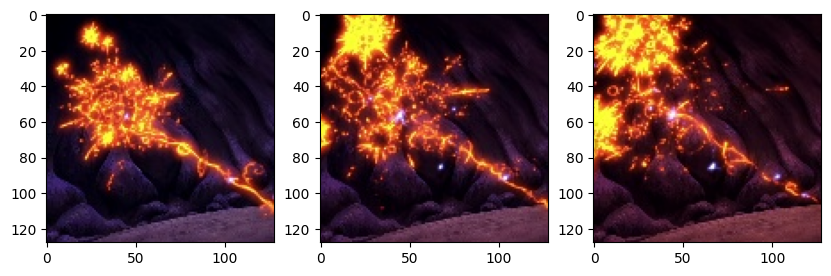

In [ ]:
show_3_frames(x, y)